#**Water Consumption (Regression)**

In [ ]:
!pip install category_encoders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,PowerTransformer
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import tensorflow as tf
from scipy.stats import zscore
import category_encoders as ce
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
df=pd.read_csv('/content/AguaH.csv')
df

,USO2013,TU,DC,M,UL,f.1_ENE_09,f.1_FEB_09,f.1_MAR_09,f.1_ABR_09,f.1_MAY_09,...,f.1_MAR_15,f.1_ABR_15,f.1_MAY_15,f.1_JUN_15,f.1_JUL_15,f.1_AGO_15,f.1_SEP_15,f.1_OCT_15,f.1_NOV_15,f.1_DIC_15
0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0,20.0,20.0,20.0,20.0,20.0,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.0,NaN,30.0,30.0,30.0,30.0,...,11.0,13.0,16.0,14.0,15.0,16.0,13.0,17.0,17.0,11.0
2,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.0,NaN,NaN,NaN,NaN,NaN,...,6.0,9.0,7.0,8.0,8.0,10.0,12.0,9.0,6.0,3.0
3,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.0,NaN,NaN,NaN,NaN,NaN,...,17.0,20.0,16.0,16.0,18.0,18.0,17.0,17.0,18.0,9.0
4,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178592,RHC,COMERCIAL,3.0,ADCOM,6614.0,2574.0,1685.0,1141.0,1316.0,1521.0,...,4924.0,4346.0,5118.0,4755.0,6444.0,5783.0,6476.0,3123.0,4756.0,4435.0
178593,MX,COMERCIAL,3.0,ADCOM,6614.0,2574.0,1685.0,1141.0,1316.0,1521.0,...,4924.0,4346.0,5118.0,4755.0,6444.0,5783.0,6476.0,3123.0,4756.0,4435.0
178594,RHC,COMERCIAL,3.0,ADCOM,6614.0,2574.0,1685.0,1141.0,1316.0,1521.0,...,4924.0,4346.0,5118.0,4755.0,6444.0,5783.0,6476.0,3123.0,4756.0,4435.0
178595,MX,COMERCIAL,3.0,ADCOM,6614.0,2574.0,1685.0,1141.0,1316.0,1521.0,...,4924.0,4346.0,5118.0,4755.0,6444.0,5783.0,6476.0,3123.0,4756.0,4435.0


#**Data Preprocessing**

In [ ]:
df.isnull().sum()

,0
USO2013,0
TU,0
DC,0
M,41071
UL,43086
...,...
f.1_AGO_15,3029
f.1_SEP_15,2959
f.1_OCT_15,2822
f.1_NOV_15,2729


##**Handle NULL**

In [ ]:
num_columns=df.select_dtypes(include=['number']).columns
num_columns

Index(['DC', 'UL', 'f.1_ENE_09', 'f.1_FEB_09', 'f.1_MAR_09', 'f.1_ABR_09',
       'f.1_MAY_09', 'f.1_JUN_09', 'f.1_JUL_09', 'f.1_AGO_09', 'f.1_SEP_09',
       'f.1_OCT_09', 'f.1_NOV_09', 'f.1_DIC_09', 'f.1_ENE_10', 'f.1_FEB_10',
       'f.1_MAR_10', 'f.1_ABR_10', 'f.1_MAY_10', 'f.1_JUN_10', 'f.1_JUL_10',
       'f.1_AGO_10', 'f.1_SEP_10', 'f.1_OCT_10', 'f.1_NOV_10', 'f.1_DIC_10',
       'f.1_ENE_11', 'f.1_FEB_11', 'f.1_MAR_11', 'f.1_ABR_11', 'f.1_MAY_11',
       'f.1_JUN_11', 'f.1_JUL_11', 'f.1_AGO_11', 'f.1_SEP_11', 'f.1_OCT_11',
       'f.1_NOV_11', 'f.1_DIC_11', 'f.1_ENE_12', 'f.1_FEB_12', 'f.1_MAR_12',
       'f.1_ABR_12', 'f.1_MAY_12', 'f.1_JUN_12', 'f.1_JUL_12', 'f.1_AGO_12',
       'f.1_SEP_12', 'f.1_OCT_12', 'f.1_NOV_12', 'f.1_DIC_12', 'f.1_ENE_13',
       'f.1_FEB_13', 'f.1_MAR_13', 'f.1_ABR_13', 'f.1_MAY_13', 'f.1_JUN_13',
       'f.1_JUL_13', 'f.1_AGO_13', 'f.1_SEP_13', 'f.1_OCT_13', 'f.1_NOV_13',
       'f.1_DIC_13', 'f.1_ENE_14', 'f.1_FEB_14', 'f.1_MAR_14', 'f.1_ABR_14',
 

In [ ]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')

df[num_columns] = mean_imputer.fit_transform(df[num_columns])

In [ ]:
cat_feature=df.select_dtypes(include=['object']).columns
cat_feature

Index(['USO2013', 'TU', 'M'], dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
simple=SimpleImputer(strategy='most_frequent')
df[cat_feature]=simple.fit_transform(df[cat_feature])

In [ ]:
df.isnull().sum()

,0
USO2013,0
TU,0
DC,0
M,0
UL,0
...,...
f.1_AGO_15,0
f.1_SEP_15,0
f.1_OCT_15,0
f.1_NOV_15,0


In [ ]:
df.duplicated().sum()

15325

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Month mapping for Spanish month abbreviations
month_map = {
    "ENE": 1, "FEB": 2, "MAR": 3, "ABR": 4, "MAY": 5, "JUN": 6,
    "JUL": 7, "AGO": 8, "SEP": 9, "OCT": 10, "NOV": 11, "DIC": 12
}

# Process columns to extract month, year, and value
def extract_month_year_from_value(value, col_name):
    # Split the column name to extract month and year
    parts = col_name.split('_')
    if len(parts) == 3:
        month_abbr = parts[1]
        year = int("20" + parts[2])  # Convert two-digit year to four-digit
        month = month_map.get(month_abbr, None)
        return {"Month": month, "Year": year, "Value": value}
    return None

# Create an empty list to store the transformed data
transformed_data = []

# Loop through each row
for index, row in df.iterrows():
    row_data = {}
    for col in df.columns:
        if "f.1_" in col:
            # Extract the month, year, and value for each feature
            result = extract_month_year_from_value(row[col], col)
            if result:
                # If year is not already in the row_data, initialize it
                year = result['Year']
                if year not in row_data:
                    row_data[year] = []
                row_data[year].append(result['Value'])

    # After processing each row, calculate the mean of values for each year
    aggregated_data = {}
    for year, values in row_data.items():
        aggregated_data[year] = np.mean(values)  # Aggregating by mean

    transformed_data.append(aggregated_data)

# Convert the aggregated data into a DataFrame
aggregated_df = pd.DataFrame(transformed_data)

# Rename the columns to reflect the years and remove 'Feature' year column
aggregated_df.columns = [str(year) for year in aggregated_df.columns]




In [ ]:
aggregated_df

,2009,2010,2011,2012,2013,2014,2015
0,20.000000,20.000000,14.166667,10.000000,13.916667,3.083333,11.000000
1,32.895662,30.000000,30.000000,30.000000,29.916667,14.083333,12.583333
2,60.911299,40.538800,37.710226,39.695611,67.652824,20.589871,8.083333
3,60.911299,29.400887,16.416667,15.000000,13.250000,18.833333,14.916667
4,20.000000,20.000000,20.000000,20.000000,21.666667,28.333333,25.333333
...,...,...,...,...,...,...,...
163267,60.911299,40.538800,37.710226,39.695611,67.652824,34.131554,14.333333
163268,60.911299,40.538800,37.710226,39.695611,67.652824,86.887368,76.886640
163269,25.000000,25.000000,25.000000,25.000000,24.916667,70.750000,50.416667
163270,2441.250000,1386.000000,1305.083333,1523.833333,3357.416667,4710.333333,5109.583333


In [ ]:
df=pd.concat([aggregated_df,df],axis=1)

In [ ]:
df

,2009,2010,2011,2012,2013,2014,2015,USO2013,TU,DC,...,f.1_MAR_15,f.1_ABR_15,f.1_MAY_15,f.1_JUN_15,f.1_JUL_15,f.1_AGO_15,f.1_SEP_15,f.1_OCT_15,f.1_NOV_15,f.1_DIC_15
0,20.000000,20.000000,14.166667,10.000000,13.916667,3.083333,11.000000,H3,DOMESTICO MEDIO,0.5,...,2.000000,1.000000,2.000000,1.000000,7.000000,7.000000,42.000000,27.0,22.0,21.0
1,32.895662,30.000000,30.000000,30.000000,29.916667,14.083333,12.583333,H3,DOMESTICO MEDIO,0.5,...,11.000000,13.000000,16.000000,14.000000,15.000000,16.000000,13.000000,17.0,17.0,11.0
2,60.911299,40.538800,37.710226,39.695611,67.652824,20.589871,8.083333,H3,DOMESTICO RESIDENCIAL,0.5,...,6.000000,9.000000,7.000000,8.000000,8.000000,10.000000,12.000000,9.0,6.0,3.0
3,60.911299,29.400887,16.416667,15.000000,13.250000,18.833333,14.916667,H3,DOMESTICO MEDIO,0.5,...,17.000000,20.000000,16.000000,16.000000,18.000000,18.000000,17.000000,17.0,18.0,9.0
4,20.000000,20.000000,20.000000,20.000000,21.666667,28.333333,25.333333,H3,DOMESTICO RESIDENCIAL,0.5,...,27.000000,27.000000,27.000000,28.000000,28.000000,31.000000,27.000000,27.0,27.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H2,DOMESTICO MEDIO,0.5,...,13.000000,16.000000,14.000000,16.000000,18.000000,16.000000,15.000000,14.0,14.0,10.0
178583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H2,DOMESTICO MEDIO,0.5,...,88.050466,81.666963,91.202236,86.199536,111.456782,101.373456,111.219725,18.0,18.0,18.0
178585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RHC,COMERCIAL,0.5,...,79.000000,90.000000,55.000000,23.000000,23.000000,21.000000,43.000000,47.0,34.0,30.0
178586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EQ,COMERCIAL,3.0,...,4924.000000,4346.000000,5118.000000,4755.000000,6444.000000,5783.000000,6476.000000,3123.0,4756.0,4435.0


In [ ]:
feature=[col for col in df.columns if "f.1_" in col]
df.drop(feature,axis=1,inplace=True)

In [ ]:
df

,2009,2010,2011,2012,2013,2014,2015,USO2013,TU,DC,M,UL
0,20.000000,20.000000,14.166667,10.000000,13.916667,3.083333,11.000000,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.000000
1,32.895662,30.000000,30.000000,30.000000,29.916667,14.083333,12.583333,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.000000
2,60.911299,40.538800,37.710226,39.695611,67.652824,20.589871,8.083333,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.000000
3,60.911299,29.400887,16.416667,15.000000,13.250000,18.833333,14.916667,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.000000
4,20.000000,20.000000,20.000000,20.000000,21.666667,28.333333,25.333333,H3,DOMESTICO RESIDENCIAL,0.5,CICASA MMD-15 S,1278.758226
...,...,...,...,...,...,...,...,...,...,...,...,...
178582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H2,DOMESTICO MEDIO,0.5,MSDELAUNET,258.000000
178583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H2,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,1278.758226
178585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RHC,COMERCIAL,0.5,MSDELAUNET,1646.000000
178586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EQ,COMERCIAL,3.0,ADCOM,6614.000000


In [ ]:
df.isnull().sum()

,0
2009,13877
2010,13877
2011,13877
2012,13877
2013,13877
2014,13877
2015,13877
USO2013,13877
TU,13877
DC,13877


In [ ]:
num_columns=df.select_dtypes(include=['number']).columns
num_columns

Index(['2009', '2010', '2011', '2012', '2013', '2014', '2015', 'DC', 'UL'], dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')

df[num_columns] = mean_imputer.fit_transform(df[num_columns])

In [ ]:
cat_feature=df.select_dtypes(include=['object']).columns
cat_feature

Index(['USO2013', 'TU', 'M'], dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
simple=SimpleImputer(strategy='most_frequent')
df[cat_feature]=simple.fit_transform(df[cat_feature])

In [ ]:
df.isnull().sum()

,0
2009,0
2010,0
2011,0
2012,0
2013,0
2014,0
2015,0
USO2013,0
TU,0
DC,0


In [ ]:
monthly_columns = [col for col in df.columns if col.startswith('20')]

# Calculate the mean across these columns for each row
df['consumption'] = df[monthly_columns].mean(axis=1)

In [ ]:
df

,2009,2010,2011,2012,2013,2014,2015,USO2013,TU,DC,M,UL,consumption
0,20.000000,20.000000,14.166667,10.000000,13.916667,3.083333,11.000000,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.000000,13.166667
1,32.895662,30.000000,30.000000,30.000000,29.916667,14.083333,12.583333,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.000000,25.639857
2,60.911299,40.538800,37.710226,39.695611,67.652824,20.589871,8.083333,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.000000,39.311709
3,60.911299,29.400887,16.416667,15.000000,13.250000,18.833333,14.916667,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.000000,24.104122
4,20.000000,20.000000,20.000000,20.000000,21.666667,28.333333,25.333333,H3,DOMESTICO RESIDENCIAL,0.5,CICASA MMD-15 S,1278.758226,22.190476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178582,25.673483,20.494892,18.780680,17.530195,18.714999,18.304117,17.756184,H2,DOMESTICO MEDIO,0.5,MSDELAUNET,258.000000,19.607793
178583,25.673483,20.494892,18.780680,17.530195,18.714999,18.304117,17.756184,H2,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,1278.758226,19.607793
178585,25.673483,20.494892,18.780680,17.530195,18.714999,18.304117,17.756184,RHC,COMERCIAL,0.5,MSDELAUNET,1646.000000,19.607793
178586,25.673483,20.494892,18.780680,17.530195,18.714999,18.304117,17.756184,EQ,COMERCIAL,3.0,ADCOM,6614.000000,19.607793


In [ ]:
for col in df.columns:
    if col in num_columns:
        df[col] = df[col].round(2)

In [ ]:
df

,2009,2010,2011,2012,2013,2014,2015,USO2013,TU,DC,M,UL,consumption
0,20.00,20.00,14.17,10.00,13.92,3.08,11.00,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.00,13.166667
1,32.90,30.00,30.00,30.00,29.92,14.08,12.58,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.00,25.639857
2,60.91,40.54,37.71,39.70,67.65,20.59,8.08,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.00,39.311709
3,60.91,29.40,16.42,15.00,13.25,18.83,14.92,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.00,24.104122
4,20.00,20.00,20.00,20.00,21.67,28.33,25.33,H3,DOMESTICO RESIDENCIAL,0.5,CICASA MMD-15 S,1278.76,22.190476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178582,25.67,20.49,18.78,17.53,18.71,18.30,17.76,H2,DOMESTICO MEDIO,0.5,MSDELAUNET,258.00,19.607793
178583,25.67,20.49,18.78,17.53,18.71,18.30,17.76,H2,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,1278.76,19.607793
178585,25.67,20.49,18.78,17.53,18.71,18.30,17.76,RHC,COMERCIAL,0.5,MSDELAUNET,1646.00,19.607793
178586,25.67,20.49,18.78,17.53,18.71,18.30,17.76,EQ,COMERCIAL,3.0,ADCOM,6614.00,19.607793


In [ ]:
df['TU'].unique()

array(['DOMESTICO MEDIO', 'DOMESTICO RESIDENCIAL', 'DOMESTICO BAJA',
       'SOCIAL', 'COMERCIAL', 'INDUSTRIAL', 'ESPECIAL'], dtype=object)

In [ ]:
translation_dict = {
    'DOMESTICO MEDIO': 'Average Household',
    'DOMESTICO RESIDENCIAL': 'Residential Household',
    'DOMESTICO BAJA': 'Low Household',
    'SOCIAL': 'Social',
    'COMERCIAL': 'Commercial',
    'INDUSTRIAL': 'Industrial',
    'ESPECIAL': 'Special'
}

# Assuming the feature is in a DataFrame column called 'feature_column'
df['tu'] = df['TU'].map(translation_dict)

In [ ]:
df

,2009,2010,2011,2012,2013,2014,2015,USO2013,TU,DC,M,UL,consumption,tu
0,20.00,20.00,14.17,10.00,13.92,3.08,11.00,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.00,13.166667,Average Household
1,32.90,30.00,30.00,30.00,29.92,14.08,12.58,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.00,25.639857,Average Household
2,60.91,40.54,37.71,39.70,67.65,20.59,8.08,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.00,39.311709,Residential Household
3,60.91,29.40,16.42,15.00,13.25,18.83,14.92,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.00,24.104122,Average Household
4,20.00,20.00,20.00,20.00,21.67,28.33,25.33,H3,DOMESTICO RESIDENCIAL,0.5,CICASA MMD-15 S,1278.76,22.190476,Residential Household
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178582,25.67,20.49,18.78,17.53,18.71,18.30,17.76,H2,DOMESTICO MEDIO,0.5,MSDELAUNET,258.00,19.607793,Average Household
178583,25.67,20.49,18.78,17.53,18.71,18.30,17.76,H2,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,1278.76,19.607793,Average Household
178585,25.67,20.49,18.78,17.53,18.71,18.30,17.76,RHC,COMERCIAL,0.5,MSDELAUNET,1646.00,19.607793,Commercial
178586,25.67,20.49,18.78,17.53,18.71,18.30,17.76,EQ,COMERCIAL,3.0,ADCOM,6614.00,19.607793,Commercial


In [ ]:
df.drop('TU',axis=1,inplace=True)

In [ ]:
df['USO2013'].unique()

array(['H3', 'AVD', 'MX', 'IRM', 'RHC', 'H2', 'H1', 'EQ', 'RG', 'IRB',
       'RIC', 'IN', 'IRA', 'CU'], dtype=object)

In [ ]:
df.drop('M',axis=1,inplace=True)

In [ ]:
df

,2009,2010,2011,2012,2013,2014,2015,USO2013,DC,UL,consumption,tu
0,20.00,20.00,14.17,10.00,13.92,3.08,11.00,H3,0.5,197.00,13.166667,Average Household
1,32.90,30.00,30.00,30.00,29.92,14.08,12.58,H3,0.5,307.00,25.639857,Average Household
2,60.91,40.54,37.71,39.70,67.65,20.59,8.08,H3,0.5,179.00,39.311709,Residential Household
3,60.91,29.40,16.42,15.00,13.25,18.83,14.92,H3,0.5,852.00,24.104122,Average Household
4,20.00,20.00,20.00,20.00,21.67,28.33,25.33,H3,0.5,1278.76,22.190476,Residential Household
...,...,...,...,...,...,...,...,...,...,...,...,...
178582,25.67,20.49,18.78,17.53,18.71,18.30,17.76,H2,0.5,258.00,19.607793,Average Household
178583,25.67,20.49,18.78,17.53,18.71,18.30,17.76,H2,0.5,1278.76,19.607793,Average Household
178585,25.67,20.49,18.78,17.53,18.71,18.30,17.76,RHC,0.5,1646.00,19.607793,Commercial
178586,25.67,20.49,18.78,17.53,18.71,18.30,17.76,EQ,3.0,6614.00,19.607793,Commercial


In [ ]:
encoder = ce.BinaryEncoder()
df_new = encoder.fit_transform(df[['USO2013','tu']])


In [ ]:
df=pd.concat([df,df_new],axis=1)

In [ ]:
df

,2009,2010,2011,2012,2013,2014,2015,USO2013,DC,UL,consumption,tu,USO2013_0,USO2013_1,USO2013_2,USO2013_3,tu_0,tu_1,tu_2
0,20.00,20.00,14.17,10.00,13.92,3.08,11.00,H3,0.5,197.00,13.166667,Average Household,0,0,0,1,0,0,1
1,32.90,30.00,30.00,30.00,29.92,14.08,12.58,H3,0.5,307.00,25.639857,Average Household,0,0,0,1,0,0,1
2,60.91,40.54,37.71,39.70,67.65,20.59,8.08,H3,0.5,179.00,39.311709,Residential Household,0,0,0,1,0,1,0
3,60.91,29.40,16.42,15.00,13.25,18.83,14.92,H3,0.5,852.00,24.104122,Average Household,0,0,0,1,0,0,1
4,20.00,20.00,20.00,20.00,21.67,28.33,25.33,H3,0.5,1278.76,22.190476,Residential Household,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178582,25.67,20.49,18.78,17.53,18.71,18.30,17.76,H2,0.5,258.00,19.607793,Average Household,0,1,1,0,0,0,1
178583,25.67,20.49,18.78,17.53,18.71,18.30,17.76,H2,0.5,1278.76,19.607793,Average Household,0,1,1,0,0,0,1
178585,25.67,20.49,18.78,17.53,18.71,18.30,17.76,RHC,0.5,1646.00,19.607793,Commercial,0,1,0,1,1,0,1
178586,25.67,20.49,18.78,17.53,18.71,18.30,17.76,EQ,3.0,6614.00,19.607793,Commercial,1,0,0,0,1,0,1


In [ ]:
df.drop('USO2013',axis=1,inplace=True)
df.drop('tu',axis=1,inplace=True)


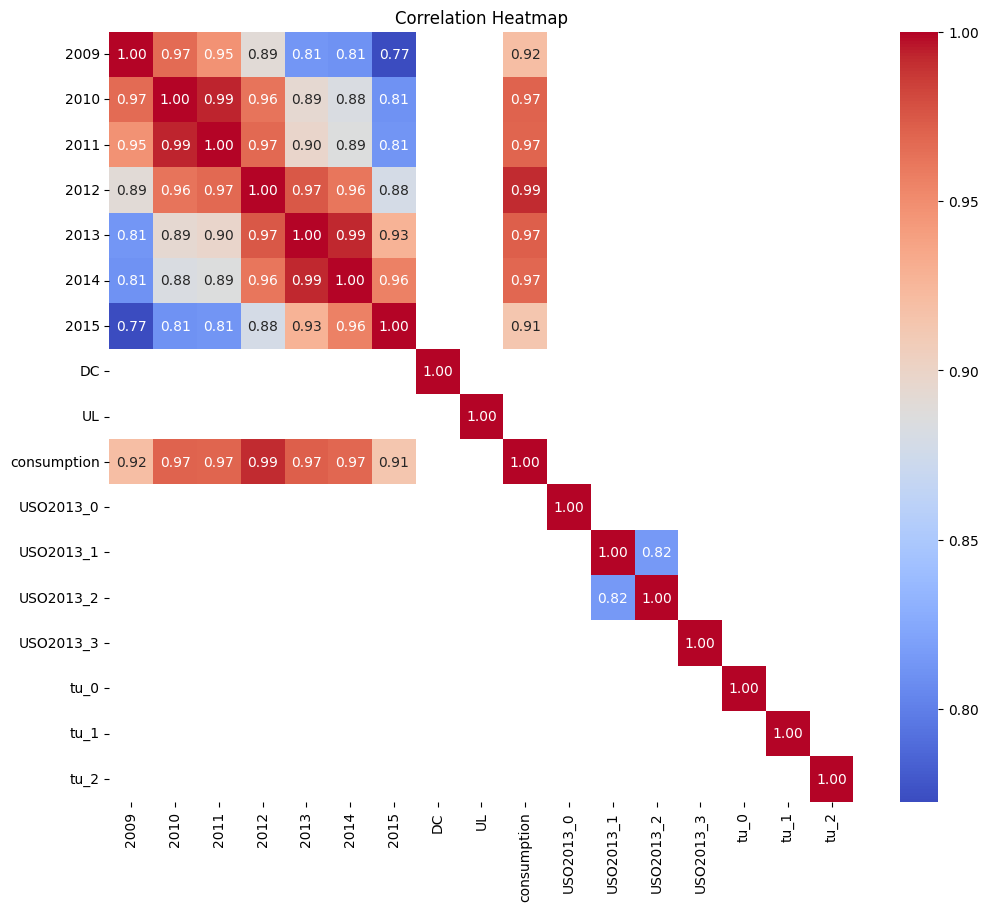

In [ ]:
corr_data = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt='.2f',mask=corr_data<.6)
plt.title('Correlation Heatmap')
plt.show()

##**Check Outlier**

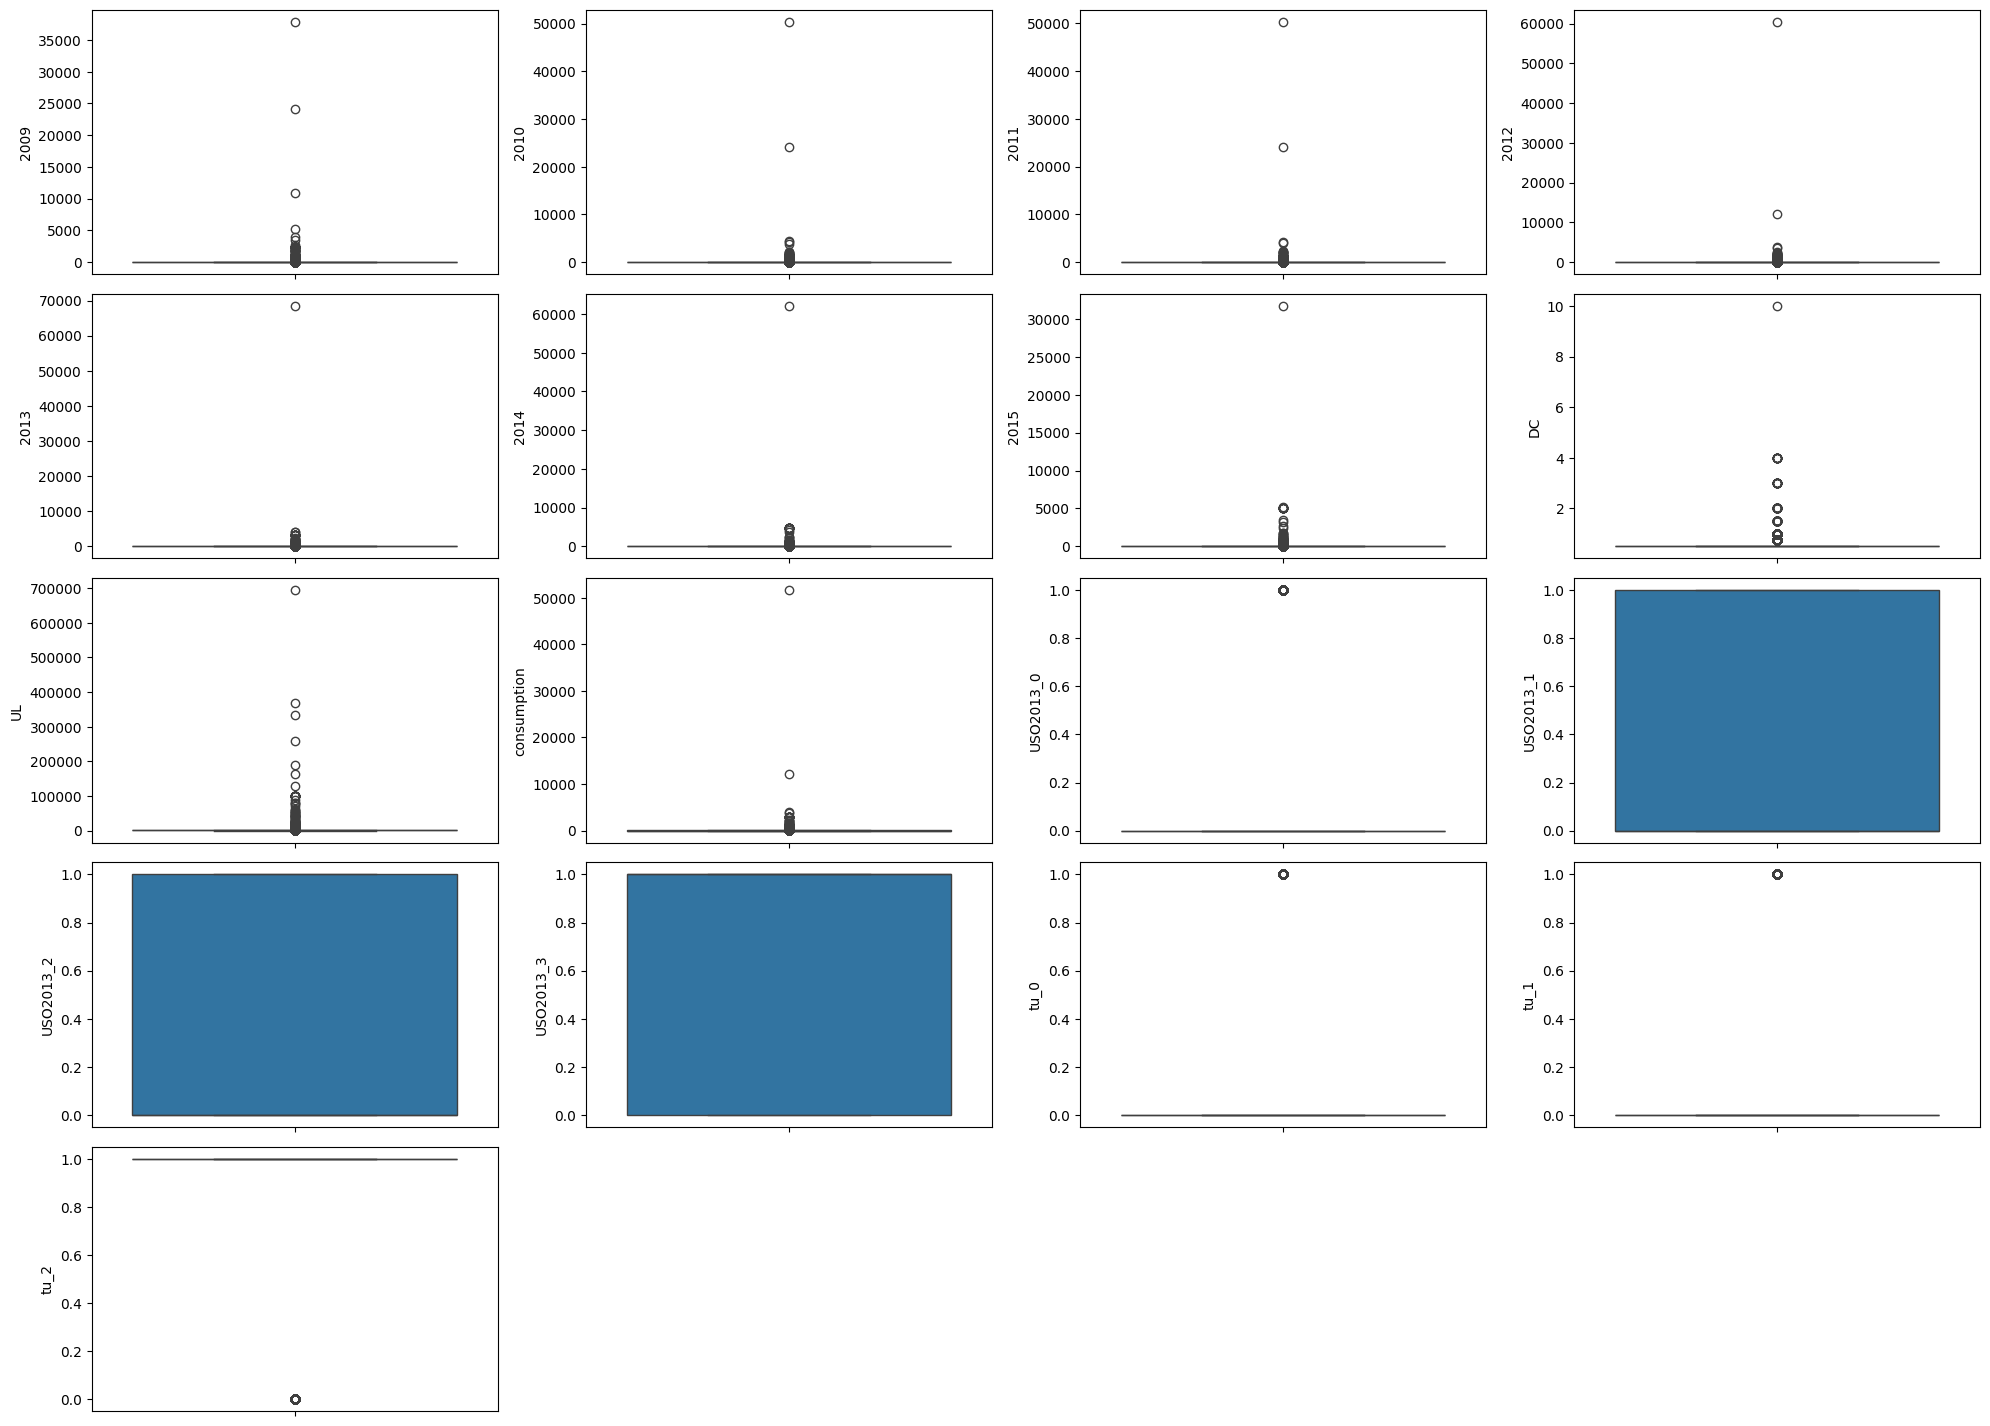

In [ ]:
plt.figure(figsize=(20,20))
x=1
for col in df.columns:
  plt.subplot(7,4,x)
  sns.boxplot(df[col])
  x+=1
plt.tight_layout()
plt.show()

##**Handle Outlier**

In [ ]:
for col in df.columns:
  df['Z_Score'] = zscore(df[col])
  threshold = 3
  lower_bound = df[col].mean() - threshold * df[col].std()
  upper_bound = df[col].mean() + threshold * df[col].std()
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
  df.drop(columns='Z_Score', inplace=True)

##**Skew**

In [ ]:
df.skew()

,0
2009,5.099191
2010,11.844993
2011,12.069026
2012,13.576609
2013,11.702743
2014,11.095438
2015,7.918016
DC,10.821802
UL,2.382079
consumption,13.250305


##**Split Data**

In [ ]:
x=df.drop('consumption',axis=1)
y=df['consumption']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
x_train = pt.fit_transform(x_train)
x_test = pt.transform(x_test)


In [ ]:
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x.shape

(177149, 16)

#**Train Neural Network Model for Regression**

In [ ]:
ealy_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15,min_delta=2,restore_best_weights=True,mode='max')

In [ ]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='model.keras',monitor='r2_score',save_best_only=True,mode='max',save_freq=10)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(16,)),  # Assuming 16 input features
    Dense(64, activation='relu', kernel_initializer='HeNormal'),
    Dense(32, activation='relu', kernel_initializer='HeNormal'),
    Dense(16, activation='relu', kernel_initializer='HeNormal'),
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mae','r2_score'])

In [ ]:
hist=model.fit(
    x_train,y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=914,
    callbacks=[ealy_stop, model_checkpoint]
    )

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 341.5650 - mae: 12.7714 - r2_score: -0.5414 - val_loss: 35.6592 - val_mae: 3.6994 - val_r2_score: 0.8022
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 31.5932 - mae: 3.1299 - r2_score: 0.8508 - val_loss: 20.6797 - val_mae: 1.7610 - val_r2_score: 0.8853
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.4659 - mae: 1.6567 - r2_score: 0.9076 - val_loss: 16.2552 - val_mae: 1.3254 - val_r2_score: 0.9098
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.3154 - mae: 1.2831 - r2_score: 0.9263 - val_loss: 13.7875 - val_mae: 1.2838 - val_r2_score: 0.9235
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12.4740 - mae: 1.1410 - r2_score: 0.9418 - val_loss: 10.8663 - val_mae: 0.9079 - val_r2_score: 0.9397
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10.7829 - mae: 0.8928 - r2_score: 0.9526 - val_loss: 10.6437 - val_mae: 1.0160 - val_r2_score: 0.9409
Epoch 7/50
125/125 ━━━━━

In [ ]:
model.evaluate(x_train,y_train)

4429/4429 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 35.5552 - mae: 3.6954 - r2_score: 0.8280


[36.85905075073242, 3.7053420543670654, 0.8206406831741333]

In [ ]:
model.evaluate(x_test,y_test)

1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 31.2174 - mae: 3.7060 - r2_score: 0.8132


[33.88913345336914, 3.710965394973755, 0.8162320852279663]

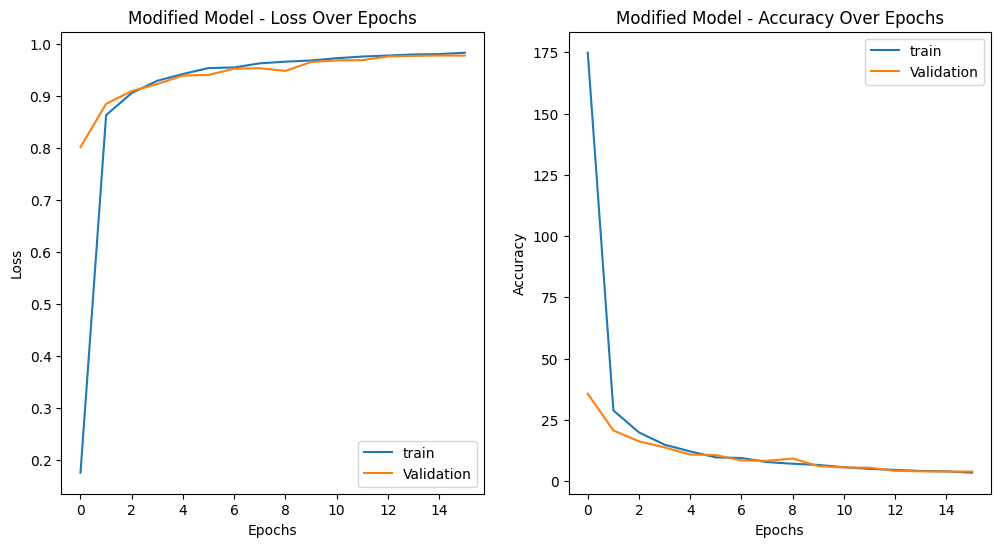

In [ ]:
# Plotting training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['r2_score'],label='train')
plt.plot(hist.history['val_r2_score'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Modified Model - Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Modified Model - Accuracy Over Epochs')
plt.legend()
plt.show()

#**Apply modifications to the model: Handle Class Weights**

In [ ]:
ealy_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15,min_delta=.000001,restore_best_weights=True,mode='auto')

In [ ]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='model.keras',monitor='r2_score',save_best_only=True,mode='max',save_freq=10)

In [ ]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(16,)),
    Dense(64,activation='relu',kernel_initializer='HeNormal'),
    Dense(32,activation='relu',kernel_initializer='HeNormal'),
    Dropout(0.01),
    Dense(16,activation='relu',kernel_initializer='HeNormal'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mae','r2_score'])

In [ ]:
hist=model.fit(x_train,y_train,epochs=50,validation_split=0.2,batch_size=914,callbacks=ealy_stop)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 278.7910 - mae: 11.4137 - r2_score: -0.4078 - val_loss: 32.1225 - val_mae: 3.4071 - val_r2_score: 0.8218
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 29.2904 - mae: 2.8258 - r2_score: 0.8645 - val_loss: 17.7754 - val_mae: 1.5818 - val_r2_score: 0.9014
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17.0351 - mae: 1.4617 - r2_score: 0.9186 - val_loss: 13.3134 - val_mae: 1.2358 - val_r2_score: 0.9261
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.0673 - mae: 1.1375 - r2_score: 0.9270 - val_loss: 9.9633 - val_mae: 0.7418 - val_r2_score: 0.9447
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.2317 - mae: 0.8662 - r2_score: 0.9548 - val_loss: 8.6305 - val_mae: 0.7558 - val_r2_score: 0.9521
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7756 - mae: 0.8346 - r2_score: 0.9657 - val_loss: 8.0024 - val_mae: 0.7143 - val_r2_score: 0.9556
Epoch 7/50
125/125 ━━━━━━━━━

In [ ]:
model.evaluate(x_train,y_train)

4429/4429 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.5243 - mae: 0.2268 - r2_score: 0.9974


[0.8873642683029175, 0.23257067799568176, 0.9956820011138916]

In [ ]:
model.evaluate(x_test,y_test)

1108/1108 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8767 - mae: 0.2425 - r2_score: 0.9887


[1.636589765548706, 0.2386607676744461, 0.9911254048347473]

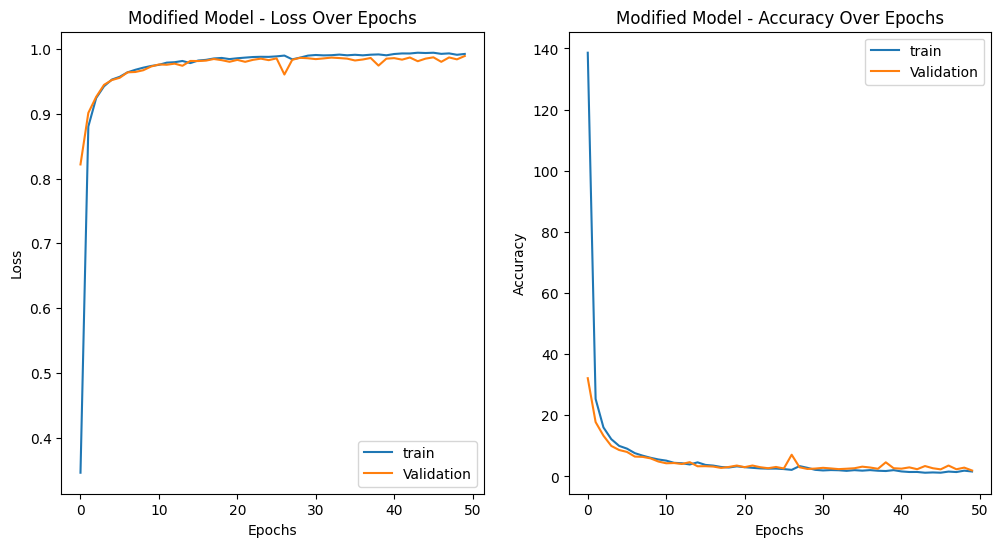

In [ ]:
# Plotting training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['r2_score'],label='train')
plt.plot(hist.history['val_r2_score'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Modified Model - Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Modified Model - Accuracy Over Epochs')
plt.legend()
plt.show()

#**Evaluate on Testing Data After Modifications**

In [ ]:
test_MSE, test_MAE, test_R2Score = model.evaluate(x_test,y_test)
print(f"\nModified Model - Test MSE: {test_MSE}")
print(f"Modified Model - Test MAE: {test_MAE}")
print(f"Modified Model - Test R2 Score: {test_R2Score}")

1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8767 - mae: 0.2425 - r2_score: 0.9887

Modified Model - Test MSE: 1.636589765548706
Modified Model - Test MAE: 0.2386607676744461
Modified Model - Test R2 Score: 0.9911254048347473


#**Use the model to make predictions on unseen examples**

In [ ]:
# Generate predictions on the test set
y_pred = model.predict(x_test)

# Print Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nRegression Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Regression Metrics:
Mean Absolute Error (MAE): 0.24
Mean Squared Error (MSE): 1.64
Root Mean Squared Error (RMSE): 1.28
R-Squared (R²): 0.99


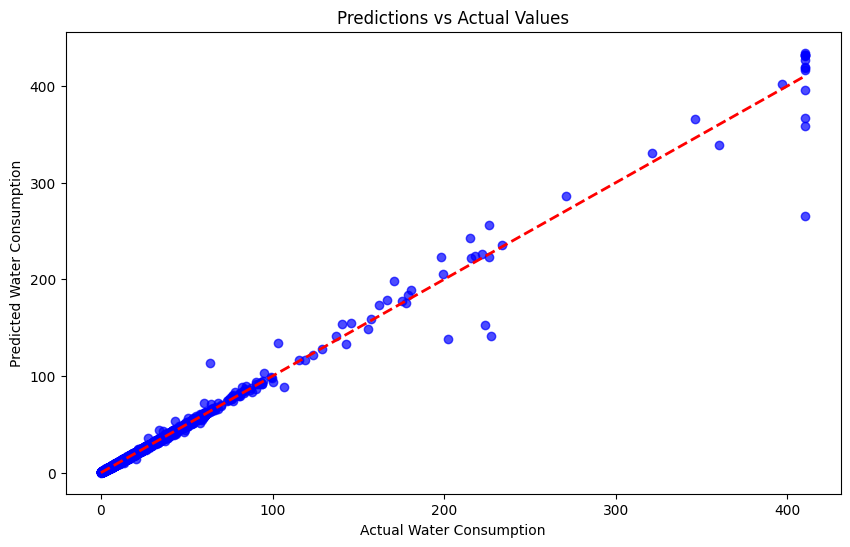

In [ ]:
# Visualize Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.title("Predictions vs Actual Values")
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.show()

#**Feature Importance (Using Permutation Importance)**

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate Permutation Importance for Regression
permutation_importance_results = permutation_importance(
    model, x_test, y_test, scoring='neg_mean_squared_error'
)

1108/1108 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1108/1108 ━

In [ ]:
df.columns

Index(['2009', '2010', '2011', '2012', '2013', '2014', '2015', 'DC', 'UL',
       'consumption', 'USO2013_0', 'USO2013_1', 'USO2013_2', 'USO2013_3',
       'tu_0', 'tu_1', 'tu_2'],
      dtype='object')

In [ ]:
# Display Feature Importance
importance_df = pd.DataFrame({
    "Feature": pd.DataFrame(x_test).columns,  # Assuming column names are accessible
    "Importance": permutation_importance_results.importances_mean
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(importance_df)


Feature Importance:
    Feature  Importance
4         4   15.852521
1         1   15.149654
0         0   13.346352
2         2   11.246171
6         6   10.751238
5         5   10.446835
3         3    9.911671
12       12    0.210246
13       13    0.204046
14       14    0.192470
15       15    0.105980
10       10    0.065341
11       11    0.052630
9         9    0.034996
8         8    0.024816
7         7    0.000000


<ipython-input-98-78ac6571a7d4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


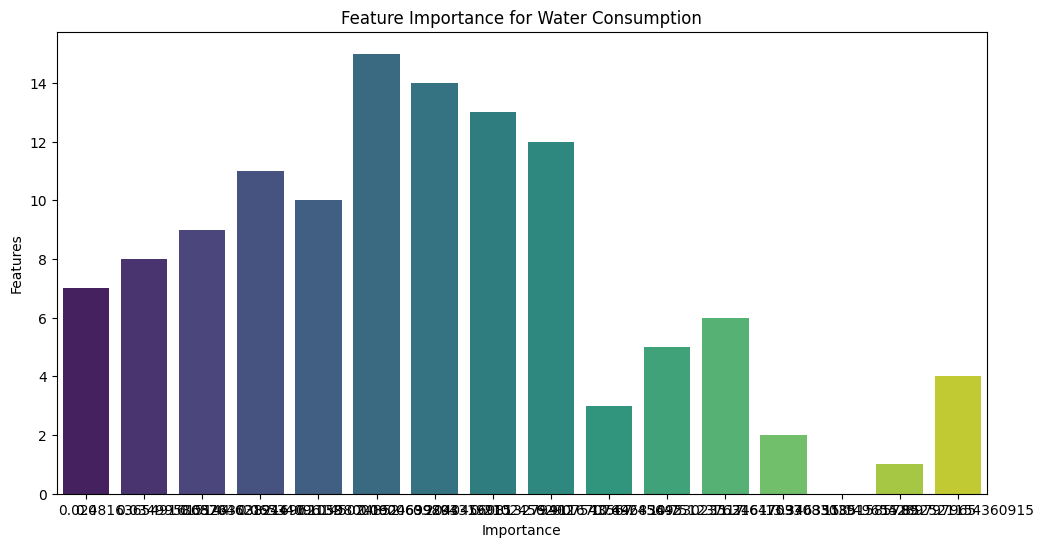

In [ ]:
# Visualize Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance for Water Consumption")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

#**Hyperparameter Tuning with GridSearchCV**

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
# Define a function to create the model for GridSearchCV
def create_model(neurons=32, dropout_rate=0.2):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(x_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons // 2, activation='relu'),
        Dense(1)  # Output for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [ ]:
from scikeras.wrappers import KerasRegressor

# Wrap the Keras model
model_grid = KerasRegressor(model=create_model, verbose=0)

# Define the grid parameters
param_grid = {
    'model__neurons': [32, 64],
    'model__dropout_rate': [0.2, 0.3],
    'batch_size': [32, 64],
    'epochs': [50]
}

In [ ]:
# Grid search
grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

In [ ]:
# Display the best parameters
print(f"\nBest Parameters: {grid_result.best_params_}")
print(f"Best Score: {grid_result.best_score_}")


Best Parameters: {'batch_size': 64, 'epochs': 50, 'model__dropout_rate': 0.2, 'model__neurons': 64}
Best Score: -9.767441588252447


#**Visualization of Weights and Biases After Training**

In [ ]:
# Access the best model
best_model = grid_result.best_estimator_.model

In [ ]:
# Accessing the weights and biases of the first layer
weights, biases = model.layers[0].get_weights()

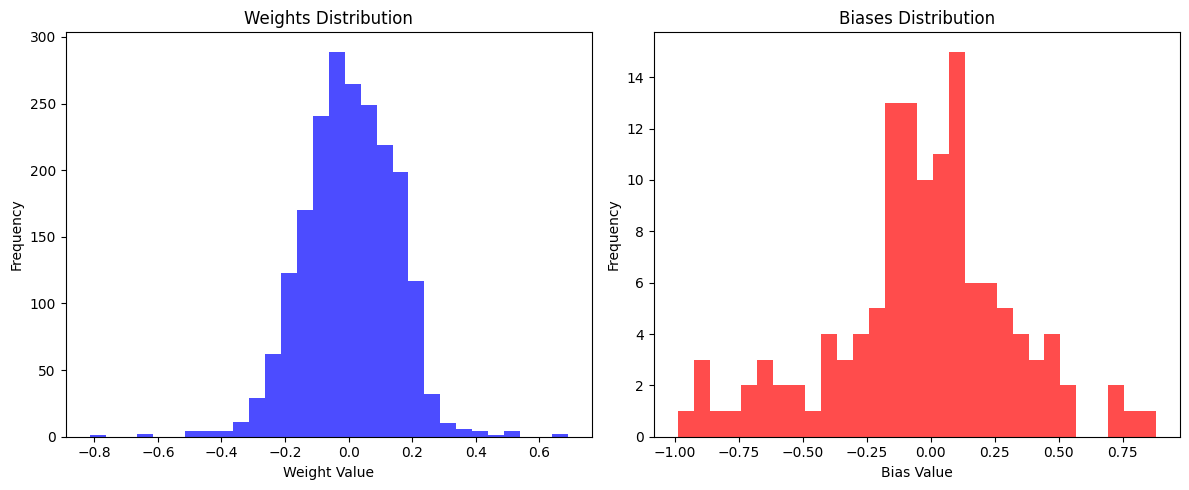

In [ ]:
# Visualization of weights and biases
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Weights Distribution
ax1.hist(weights.flatten(), bins=30, color='blue', alpha=0.7)
ax1.set_title('Weights Distribution')
ax1.set_xlabel('Weight Value')
ax1.set_ylabel('Frequency')

# Biases Distribution
ax2.hist(biases.flatten(), bins=30, color='red', alpha=0.7)
ax2.set_title('Biases Distribution')
ax2.set_xlabel('Bias Value')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()